In [3]:
import random
import matplotlib.pyplot as plt
import copy
import math
import networkx as nx
import pickle
import numpy as np

In [4]:

class Graph:
    def __init__ (self, node_num):
        self.node_num = node_num

        self.adj_list = {node : set() for node in range(node_num)}
        self.visual = [] ## VIS

        i=0
        while i<node_num-1:
            self.add_edge(i, i+1)
            i=i+1
        self.add_edge(self.node_num-1,0)    
        
        self.add_rand_edges()

    def add_edge(self, node1, node2): ## --> O/P: updates adj_list
        
        ## since graph is undirected, we add bi-directional edges
        
        self.adj_list[node1].add(node2)
        self.adj_list[node2].add(node1)

        tmp = [node1, node2] ## VIS
        self.visual.append(tmp) ## VIS

    def get_deg(self, node): ## --> O/P: INT ## func to get degree of a node
        return len(self.adj_list[node])

    def get_next_moves(self, node):
        return list(self.adj_list[node]) 

    def get_valid_neighbours(self, node): ## --> O/P: list of neighbors (e.g.: [1, 2, 3, ...] )

        valid_neighbours = []

        for i in range(-5, -1):
            next = (node + i + self.node_num) % self.node_num ## the "+ self.node_num" handles negative cases
            valid_neighbours.append(next)
        for i in range(2, 6):
            next = (node + i + self.node_num) % self.node_num ## the "+ self.node_num" handles negative cases
            valid_neighbours.append(next)

        return valid_neighbours
    
    def get_deg2_neighbours(self, node): ## --> O/P: list of neighbors with deg=2 [e.g.: [1, 2, 3, ...]]

        valid_neighbours = self.get_valid_neighbours(node)
        deg2_neighbours = []
        for i in valid_neighbours:
            if(self.get_deg(i) == 2):
                deg2_neighbours.append(i)

        return deg2_neighbours

    def get_rand_node(self):
        return random.choice(list(self.adj_list.keys()))

    def add_rand_edges(self): ## --> O/P: updates adj_list
        
        total_nodes = list(self.adj_list.keys()) ## --> total_nodes = [0,1,......,10]
        while(total_nodes):
            x = random.choice(total_nodes)
            valid_nbrs = self.get_deg2_neighbours(x)
            if valid_nbrs:
                y = random.choice(valid_nbrs) ## failing where it doesn't get deg2_neighbours
                self.add_edge(x, y)
                total_nodes.remove(y) ### fails where 'y' is NULL -----> FIXED
                # print(y)
            total_nodes.remove(x)

    def getPath(self, goal, start, parent):

        result = [goal]
        while goal != start:
            goal = parent[goal]    
            result.append(goal)
        # print (goal)

        result.reverse()
        return result

    def BFS(self, start, goal):

        fringe = [start]
        visited = set()
        parent = {}
        visited.add(start)
        
        while(fringe):
            current = fringe.pop(0) #Queue so pop(0) implementing FIFO
            # visited.add(current) 
            if current == goal:
            #print(len(visited))
                return self.getPath(goal, start, parent)
            #print (current,"current")
            children = self.get_next_moves(current)
            #print(children,"test_BFS")
            for child in children:
                if child not in visited:
                    visited.add(child)
                    fringe.append(child)
                    parent[child] = current

        return None

    def print_adj_list(self):
        for i in self.adj_list.keys():
            print(i, self.adj_list[i])

    ## VIS
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

In [5]:
class Prey:
    def __init__(self, graph):
        self.loc = graph.get_rand_node()
        self.graph = graph
        
    def move(self):

        neighbours = self.graph.get_next_moves(self.loc)
        neighbours.append(self.loc)
        next = random.choice(neighbours)
        self.loc = next
        return self.loc

    def __str__(self):
        return str(self.loc)

    def __repr__(self):
        return self.loc

In [6]:
class Predator:
    def __init__(self, graph):
        self.loc = graph.get_rand_node()
        self.graph = graph

    def move(self, agent_loc):
        # assert self.loc != agent_loc ## but will this prevent agent from dying ??

        neighbours = self.graph.get_next_moves(self.loc)

        path = self.graph.BFS(self.loc, agent_loc)
        self.loc = path[1]
        return self.loc

    def __str__(self):
        return str(self.loc)

    def __repr__(self):
        return self.loc
        

In [7]:
# g1 = Graph(50)
# nx.write_gpickle(g1, "g1.gpickle")
g1 = nx.read_gpickle("g1.gpickle")

# # g2 = Graph(50)
# # nx.write_gpickle(g1, "g2.gpickle")
# g2 = nx.read_gpickle("/content/drive/MyDrive/Colab Notebooks/g2.gpickle")

# # g3 = Graph(50)
# # nx.write_gpickle(g1, "g3.gpickle")
# g3 = nx.read_gpickle("/content/drive/MyDrive/Colab Notebooks/g3.gpickle")

# # g4 = Graph(50)
# # nx.write_gpickle(g1, "g4.gpickle")
# g4 = nx.read_gpickle("/content/drive/MyDrive/Colab Notebooks/g4.gpickle")

# # g5 = Graph(50)
# # nx.write_gpickle(g1, "g5.gpickle")
# g5 = nx.read_gpickle("/content/drive/MyDrive/Colab Notebooks/g5.gpickle")


g = g1


In [ ]:
# node_num = 50
# g_test = Graph(node_num)
# nx.write_gpickle(g_test, "g_test.gpickle")



# # g.print_adj_list()

# # g.visualize()

# prey = Prey(g_test)
# # prey2 = prey1
# # prey2 = copy.deepcopy(prey1)
# # prey1 = copy.copy(prey)
# # prey2 = copy.copy(prey) ## ???? should I do deep or shallow copy of prey and pred if I want them to be separate for each agent but not have to write new code ?????
# # prey3 = copy.copy(prey)
# # prey4 = copy.copy(prey)
# prey5 = copy.copy(prey)
# # prey6 = copy.copy(prey)
# # prey7 = copy.copy(prey)
# # prey8 = copy.copy(prey)
# # prey9 = copy.copy(prey)

# pred = Predator(g_test)
# # pred2 = pred1
# # pred2 = copy.deepcopy(pred1)
# # pred1 = copy.copy(pred)
# # pred2 = copy.copy(pred)
# # pred3 = copy.copy(pred)
# # pred4 = copy.copy(pred)
# pred5 = copy.copy(pred)
# # pred6 = copy.copy(pred)
# # pred7 = copy.copy(pred)
# # pred8 = copy.copy(pred)
# # pred9 = copy.copy(pred)

# prey_belief = [1/(g_test.node_num-1)]*(g_test.node_num) ### [1/49]*50
# pred_belief = [1/(g_test.node_num-1)]*(g_test.node_num)

# threshold = 1000
# loops = 1 ### CHANGE TO 3000

In [11]:
# ####### DON'T RUN SINCE ALREADY STORED UTILITIES ####### RUN ONLY IF CALCULATING FOR NEW GRAPH ########
# state_space = {}
# def calc_state_space(g):
#     for i in range(g.node_num):
#         for j in range(g.node_num):
#             for k in range(g.node_num):
                
#                 key = (i, j,  k)
#                 # reward = [1]*graph.node_num
#                 reward = 1
#                 # util = [0]*graph.node_num
#                 util = len(g.BFS(i, j))-1

#                 state_space[key] = [reward, util]
                
# calc_state_space(g)
# # print (state_space)

In [12]:
# ####### DON'T RUN SINCE ALREADY STORED UTILITIES ####### RUN ONLY IF CALCULATING FOR NEW GRAPH ########

# for key in state_space:
#     agent_loc, prey_loc, pred_loc = key
    
#     if agent_loc == prey_loc:
#         state_space[key] = [0, state_space[key][1]]

#     if agent_loc == pred_loc:
#         state_space[key] = [math.inf, state_space[key][1]]

# # print(state_space)

In [ ]:
################ VALUE ITERATION ###################

### PRINTING TO FILE
#
f = open("/content/drive/MyDrive/Colab Notebooks/util_file.txt", "w")

error = True
count = 0
while error:

    error = False
    state_space_copy = copy.copy(state_space)

    for key in state_space:
        min_sum_arr = []
        
        agent_loc, prey_loc, pred_loc = key

        # #### for each state, agent = prey -> util=0
        #     cont
        if agent_loc == prey_loc:
            state_space[key] = [state_space[key][0], 0]
            continue

        # #### for each state, agent = pred -> util = math.INF
        #     cont
        # elif agent_loc == pred_loc or agent_loc == pred_loc - 1 or agent_loc == pred_loc + 1:
        elif agent_loc == pred_loc:    
            state_space[key] = [state_space[key][0], math.inf]          
            continue

        ### AGENT
        agent_states = {}

        agent_nbrs = g.get_next_moves(agent_loc)
        
        min_sum_arr = []###
        for nbr1 in agent_nbrs:

            ## if nbr1=prey -> sum arr append 0 
            ##      cont
            if nbr1 == prey_loc:
                min_sum_arr.append(0)
                continue
            
            elif nbr1 == pred_loc:
                min_sum_arr.append(math.inf)
                continue

            denom1 = g.get_deg(agent_loc)
            agent_states[nbr1] = 1/denom1

            prey_states = {}
            pred_states = {}

            sum = 0
            # min_sum_arr = []

            ### PREY
            # prey_states = {}

            prey_nbrs = g.get_next_moves(prey_loc)
            prey_nbrs.append(prey_loc)

            for nbr2 in prey_nbrs:
                denom2 = g.get_deg(prey_loc) + 1
                tmp2 = 1/denom2
                prey_states[nbr2] = tmp2

                ### PRED
                # pred_states = {}

                pred_nbrs = g.get_next_moves(pred_loc)

                ##########################################
                ### UNDISTRACTED PRED (FROM PROJECT 2) ###
                ##########################################
                for nbr3 in pred_nbrs:
                    denom3 = g.get_deg(pred_loc)
                    tmp3 = 1/denom3
                    pred_states[nbr3] = tmp3

                ########################################
                ### DISTRACTED PRED (FROM PROJECT 2) ###
                ########################################

                # # for i in pred_nbrs:

                #     # nbrs_i = g.get_next_moves(i)
                    
                # for nbr3 in pred_nbrs:
                #     nbr_bfs = {}
                    
                #     nbr_nbrs_i = g.get_next_moves(nbr3)
                #     for nbr_nbr in nbr_nbrs_i:
                #         bfs = g.BFS(nbr_nbr, agent_loc)
                #         nbr_bfs[nbr_nbr] = len(bfs)

                #     min_bfs = min(nbr_bfs.values())

                #     nbr_min_path_len = [key for key, value in nbr_bfs.items() if value == min_bfs]

                #     x = len(nbr_min_path_len)

                #     if i in nbr_min_path_len:
                #         pred_states[nbr3] = (0.4/g.get_deg(nbr3))+(0.6/x)

                #     else:
                #         pred_states[nbr3] = 0.4/g.get_deg(nbr3)
                
                ###########################################

                    sum += (state_space[(nbr1,nbr2,nbr3)][1] * tmp2 * tmp3)

            sum += state_space[(nbr1,nbr2,nbr3)][0]
            min_sum_arr.append(sum)
        
        if agent_loc in pred_nbrs:
            min_sum_arr = [math.inf]

        state_space[key] = [state_space[key][0], min(min_sum_arr)] ##UPDATING UTIL ##UPDATING UTIL
        
    ## WE RUN TILL ERROR CONVERGES
    for key in state_space:
        if abs(state_space[key][1] - state_space_copy[key][1]) > 0.0001:
            error = True
            break
    
    count += 1


print(count)

for key in state_space:
    print(key, state_space[key], file = f)

f.close()


61


In [13]:
########## ---- RUN THIS ONLY WHEN CALCULATING U* FOR NEW GRAPH ---- ###########

# from networkx.readwrite import gpickle
# f1 = open("/content/drive/MyDrive/Colab Notebooks/state_space", "wb")
# # nx.gpickle.
# pickle.dump(state_space, f1)
# f1.close()

In [14]:
######## ---- RUN THIS EACH TIME WHEN RECONNECTING TO RUNTIME ALONG W/ CELLS FROM STARTING TILL GRAPH INIT CELL ---- #########

f2 = open("g1_state_space", "rb")
state_space =  pickle.load(f2)
f2.close()

In [19]:
class uStarAgent:
    
    def __init__(self, graph, prey_loc, pred_loc, state_space, dbg=False):

        self.graph = graph
        self.agent_loc = graph.get_rand_node()
        self.dbg = dbg
        self.prey_loc = prey_loc
        self.pred_loc = pred_loc
        self.state_space = copy.copy(state_space)

        # while prey_loc == self.agent_loc or pred_loc == self.agent_loc or pred_loc == self.agent_loc + 1 or pred_loc == self.agent_loc - 1:
        while prey_loc == self.agent_loc or pred_loc == self.agent_loc or state_space[(self.agent_loc, prey_loc, pred_loc)][1] == math.inf:
            self.agent_loc = graph.get_rand_node()


    def debug(self, *args):
        if self.dbg:
            print("AgentU: ", args)


    def isPrey(self, loc, prey_loc):
        if self.agent_loc == prey_loc:
            return True

    def isPred(self, loc, pred_loc):
        if self.agent_loc == pred_loc:
            return True


    def move(self, prey_loc, pred_loc, state_space):

        agent_nbrs = self.graph.get_next_moves(self.agent_loc)

        agent_nbr_util = {}

        for nbr in agent_nbrs:
            # agent_nbr_util[nbr] = state_space[(nbr, self.prey_loc, self.pred_loc)][1]
            agent_nbr_util[nbr] = state_space[(nbr, prey_loc, pred_loc)][1]

        
        min_util = min(agent_nbr_util.values())

        for key in agent_nbr_util:
            if min_util == agent_nbr_util[key]:
                minm = key

        agentU.debug("AGENT NBR UTIL: ", agent_nbr_util, "(",nbr, prey_loc, pred_loc,")")


        self.agent_loc = minm

        return self.agent_loc

In [ ]:
# g1 = nx.read_gpickle("/content/drive/MyDrive/Colab Notebooks/g1.gpickle")
threshold = 5000
loops = 3000
hung = 0
cnt = 0
ans = 0

survival = []

for i in range(loops):
    preyU = Prey(g)
    predU = Predator(g)

    agentU = uStarAgent(g, preyU.loc, predU.loc, state_space, False)
    
    count = 0
    
    while agentU.agent_loc != preyU.loc and agentU.agent_loc != predU.loc:
        
        if count > threshold:
            print("HUNG SIMULATION")
            hung += 1
            continue

        agentU.debug("BEFORE", agentU.agent_loc, preyU.loc, predU.loc)

        agentU.agent_loc = agentU.move(preyU.loc, predU.loc, state_space)
        
        if agentU.isPred(agentU.agent_loc, predU.loc) and agentU.isPrey(agentU.agent_loc, preyU.loc):
            # print(True)
            ans += 1
            continue

        elif agentU.isPred(agentU.agent_loc, predU.loc):
            print(False, agentU.agent_loc, preyU.loc, predU.loc)
            continue

        elif agentU.isPrey(agentU.agent_loc, preyU.loc):
            # print(True)
            ans += 1
            continue
        
        preyU.loc = preyU.move()
        
        predU.loc = predU.move(agentU.agent_loc)
        
        if agentU.isPred(agentU.agent_loc, predU.loc) and agentU.isPrey(agentU.agent_loc, preyU.loc):
            # print(True)
            ans += 1
            continue

        elif agentU.isPred(agentU.agent_loc, predU.loc):
            print(False, agentU.agent_loc, preyU.loc, predU.loc)
            continue

        elif agentU.isPrey(agentU.agent_loc, preyU.loc):
            # print(True)
            ans += 1
            continue      
        
        count += 1

    cnt += 1
    survival.append(count)
    # print("cnt: ", cnt, "Steps : ", count)


print("============================")
print("CNT: ", cnt)
print("TRUE: ", ans)
print("FALSE: ", cnt-(ans+hung))
print("HUNG: ", hung)
# avg_steps = sum(survival)
sum = 0
for i in survival:
    sum += i

print("AVG. STEPS: ", sum/loops)
print("============================")


In [23]:

class uPartAgent:
    
    def __init__(self, graph, prey_loc, pred_loc, prey_belief, state_space, dbg=False):

        self.graph = graph
        self.agent_loc = graph.get_rand_node()
        self.dbg = dbg
        self.prey_loc = prey_loc
        self.pred_loc = pred_loc
        self.state_space = copy.copy(state_space)
        
        self.vpart_dict = {}

        # while prey_loc == self.agent_loc or pred_loc == self.agent_loc or pred_loc == self.agent_loc + 1 or pred_loc == self.agent_loc - 1:
        while prey_loc == self.agent_loc or pred_loc == self.agent_loc or state_space[(self.agent_loc, prey_loc, pred_loc)][1] == math.inf:
            self.agent_loc = graph.get_rand_node()

        self.prey_belief = prey_belief
        self.prey_belief[self.agent_loc] = 0

    def debug(self, *args):
        if self.dbg:
            print("AgentUPart: ", args)


    def isPrey(self, loc, prey_loc):
        if self.agent_loc == prey_loc:
            return True

    def isPred(self, loc, pred_loc):
        if self.agent_loc == pred_loc:
            return True

    def survey(self, prey_belief):
        ## look at current list of belief - select max prob nodes (if multiple - select one at random)
        new_prey_belief = [0.0]*(self.graph.node_num)

        val_max = max(prey_belief)
        # idx_max = 0 ## not needed
        idx_max_list = []

        for i in range(len(prey_belief)):
            if prey_belief[i] >= val_max:
                # val_max = prey_belief[i]
                idx_max_list.append(i)

        rand_idx_max = random.choice(idx_max_list)

        # ### check if prey is there or not
        # 
        if self.isPrey(rand_idx_max, self.prey_loc):
            # print("IS PREY EXECUTED: ", rand_idx_max)
            for i in range(self.graph.node_num):
                prey_belief[i] = 0.0
            prey_belief[rand_idx_max] = 1.0
            # print ("ISPREY: ", prey_belief)
            return prey_belief
        #     update_belief ## according to prey found in survey logic
                
        else:
        #     update_belief ## according to prey not found in survey logic
            for i in range(self.graph.node_num):
                # denom = sum(prey_belief)-prey_belief[rand_idx_max]
                denom = 1-prey_belief[rand_idx_max]
                new_prey_belief[i] = prey_belief[i]/denom
                new_prey_belief[rand_idx_max] = 0.0

        prey_belief = new_prey_belief
        return prey_belief

    def agent_move_prey_belief(self, prey_loc, prey_belief):

        new_prey_belief = [0.0]*(self.graph.node_num)
        # new_prey_belief = prey_belief

        if self.isPrey(self.agent_loc, prey_loc):
            for i in range(self.graph.node_num): ###///this will not actually happen since the game would be over
                prey_belief[i] = 0.0
            prey_belief[self.agent_loc] = 1.0
            return prey_belief  
        
        else:
        #   update_belief ## according to prey not found in survey logic
            for i in range(self.graph.node_num):
                # denom = sum(prey_belief)-prey_belief[self.agent_loc]
                denom = 1.0-prey_belief[self.agent_loc]
                new_prey_belief[i] = prey_belief[i]/denom
                new_prey_belief[self.agent_loc] = 0.0

        prey_belief = new_prey_belief
        return prey_belief

    def prey_move_prey_belief(self, prey_loc, prey_belief):

        new_prey_belief = [0.0]*(self.graph.node_num)
        # new_prey_belief = prey_belief

        for i in range(self.graph.node_num):
            nbrs_i = self.graph.get_next_moves(i)
            nbrs_i.append(i)
            for nbr in nbrs_i:
                denom = self.graph.get_deg(nbr) + 1
                new_prey_belief[i] += prey_belief[nbr] / denom

        prey_belief = new_prey_belief

        prey_belief = self.agent_move_prey_belief(prey_loc, prey_belief)

        # prey_belief = new_prey_belief
        return prey_belief


    def move(self, prey_loc, pred_loc, prey_belief, state_space):

        prey_belief = self.survey(prey_belief)

        agent_nbrs = self.graph.get_next_moves(self.agent_loc)

        agent_nbr_util = {}
        tmp_list = [] ##########
        for nbr in agent_nbrs:
            # agent_nbr_util[nbr] = state_space[(nbr, prey_loc, pred_loc)][1]
            tmp = 0
            tmp_dist = 0 ###########
            tmp2_list = [] ##########
            for i in range(len(prey_belief)):
                if state_space[(nbr, i, pred_loc)][1] == math.inf:
                    tmp = math.inf
                    break
                    
                tmp += state_space[(nbr, i, pred_loc)][1] * prey_belief[i]
                tmp_dist += (len(g.BFS(nbr, prey_loc))) * prey_belief[i] #############
                
            agent_nbr_util[nbr] = tmp
            
            tmp2_list.append(tmp_dist) #################
            tmp2_list.append((len(g.BFS(nbr, pred_loc))-1)) #################
            tmp2_list.append(tmp) #################
            
            tmp_list.append(tmp2_list) ###############
            
        min_util = min(agent_nbr_util.values())
        agentUPart.debug("min_util", min_util)
        for key in agent_nbr_util:
            if min_util == agent_nbr_util[key]:
                minm = key

        agentUPart.debug("AGENT NBR UTIL: ", agent_nbr_util, "(",nbr, prey_loc, pred_loc,")")

        self.agent_loc = minm

        prey_belief = self.agent_move_prey_belief(prey_loc, prey_belief)

        return self.agent_loc, tmp_list

In [ ]:
print (math.inf * 0)

nan


In [ ]:
# g1 = nx.read_gpickle("/content/drive/MyDrive/Colab Notebooks/g1.gpickle")
threshold = 5000
loops = 3000
hung = 0
cnt = 0
ans = 0

survival = []
vpart_data = []



for i in range(loops):
    preyUPart = Prey(g)
    predUPart = Predator(g)
    prey_belief = [1/(g.node_num-1)]*(g.node_num) ### [1/49]*50

    agentUPart = uPartAgent(g, preyUPart.loc, predUPart.loc, prey_belief, state_space, False)
    
    count = 0
    
    while agentUPart.agent_loc != preyUPart.loc and agentUPart.agent_loc != predUPart.loc:
        
        if count > threshold:
            print("HUNG SIMULATION")
            hung += 1
            continue

        # agentUPart.debug("BEFORE", agentUPart.agent_loc, preyUPart.loc, predUPart.loc)

        agentUPart.agent_loc, tmp_list = agentUPart.move(preyUPart.loc, predUPart.loc, prey_belief, state_space)
        for data in tmp_list:
            vpart_data.append(data)
        prey_belief = agentUPart.agent_move_prey_belief(preyUPart.loc, prey_belief)

        if agentUPart.isPred(agentUPart.agent_loc, predUPart.loc) and agentUPart.isPrey(agentUPart.agent_loc, preyUPart.loc):
            # print(True)
            ans += 1
            continue

        elif agentUPart.isPred(agentUPart.agent_loc, predUPart.loc):
            print(False, agentUPart.agent_loc, preyUPart.loc, predUPart.loc)
            continue

        elif agentUPart.isPrey(agentUPart.agent_loc, preyUPart.loc):
            # print(True)
            ans += 1
            continue
        
        preyUPart.loc = preyUPart.move()
        prey_belief = agentUPart.prey_move_prey_belief(preyUPart.loc, prey_belief) 
        
        predUPart.loc = predUPart.move(agentUPart.agent_loc)
        
        if agentUPart.isPred(agentUPart.agent_loc, predUPart.loc) and agentUPart.isPrey(agentUPart.agent_loc, preyUPart.loc):
            # print(True)
            ans += 1
            continue

        elif agentUPart.isPred(agentUPart.agent_loc, predUPart.loc):
            print(False, agentUPart.agent_loc, preyUPart.loc)
            continue

        elif agentUPart.isPrey(agentUPart.agent_loc, preyUPart.loc):
            # print(True)
            ans += 1
            continue      
        
        count += 1

    cnt += 1
    survival.append(count)
    # print("cnt: ", cnt, "Steps : ", count)

    
# print(vpart_data)
print("============================")
print("CNT: ", cnt)
print("TRUE: ", ans)
print("FALSE: ", cnt-(ans+hung))
print("HUNG: ", hung)
# avg_steps = sum(survival)
sum = 0
for i in survival:
    sum += i

print("AVG. STEPS: ", sum/loops)
print("============================")
######################################

# fv = open("vpart_input", "wb")
# # nx.gpickle.
# pickle.dump(vpart_data, fv)
# fv.close()



In [42]:

fv = open("vpart_input", "wb")
# nx.gpickle.
pickle.dump(vpart_data, fv)
fv.close()

fv = open("vpart_input", "rb")
vpart_input = pickle.load(fv)
fv.close()

# print(type(vpart_input))

In [33]:
# print(vpart_input)

[[0, 1, inf], [0, 1, inf], [0, 3, inf], [11.999999999999998, 3, 11.277225652623718], [0, 1, inf], [10.999999999999995, 3, 10.822674341122845], [0, 1, inf], [0, 3, inf], [11.0, 3, 10.28140371450237], [0, 1, inf], [0, 1, inf], [10.999999999999995, 3, 9.793109976074563], [10.999999999999995, 3, 9.793109961434588], [0, 1, inf], [0, 3, inf], [10.999999999999996, 3, 9.336667167821352], [9.0, 3, 9.038631710473654], [0, 1, inf], [0, 3, inf], [0, 1, inf], [7.999999999999998, 3, 8.685763429079465], [0, 3, inf], [6.999999999999999, 3, 8.405765424369667], [6.999999999999999, 3, 8.405771519251354], [0, 1, inf], [0.05748629600050944, 1, inf], [6.999999999999999, 3, 8.192470717566472], [6.999999999999999, 3, 8.40304853007762], [0, 1, inf], [5.999999999999997, 3, 8.326933082503567], [6.999999999999997, 2, 8.844684835367289], [3.999999999999999, 3, 7.9970126024318535], [0, 1, inf], [0, 2, inf], [3.9999999999999987, 3, 7.575197101338093], [0, 1, inf], [0, 3, inf], [0, 1, inf], [0, 3, inf], [2.9999999999

In [ ]:
# ######### SPLIT DATASET INTO 2 --> TRAINING & TESTING #########

# ### x --> 125000 * 2 [2d arr]
# ### y --> 125000 * 1 [2d arr]

# ### then split x --> x_train, x_test
# ### then split y --> y_train, y_test

# ###############################################################

# row, col = (125000, 2)
# x_complete = [[0 for n in range(col)] for m in range(row)]
# y_complete = []
# i=0
# for key in state_space:

#     agent, prey, pred = key
#     agent_prey = len(g.BFS(agent, prey))-1
#     x_complete[i][0] = agent_prey
#     agent_pred = len(g.BFS(agent, pred))-1
#     x_complete[i][1] = agent_pred

#     # y_complete[i] = state_space[key][1]
#     y_complete.append(state_space[key][1])

#     i += 1

# # y_complete[y_complete == math.inf] = 100000
# for j in range(len(y_complete)):
#     if y_complete[j] == math.inf:
#         y_complete[j] = 100

# # print(x_complete)
# ###### TRAINING SPLIT #######

# row, col = (100000, 2)
# x_train = [[0 for n in range(col)] for m in range(row)]
# y_train = []

# for i in range(100000):
#     x_train[i][0] = x_complete[i][0]
#     x_train[i][1] = x_complete[i][1]
#     y_train.append(y_complete[i])

# x = x_train
# y = y_train

# x = np.array(x)
# y = np.array(y)
# y = y.reshape(100000, 1)
# print(x, x.shape)
# print(y, y.shape)
# # print(x)

# ###### TESTING SPLIT #######

# row, col = (25000, 2)
# x_test = [[0 for n in range(col)] for m in range(row)]
# y_test = []

# for i in range(100000, 125000):
#     x_test[i-100000][0] = x_complete[i-100000][0]
#     x_test[i-100000][1] = x_complete[i-100000][1]
#     y_test.append(y_complete[i-100000])


In [9]:
####### NEURAL NETWORK - MODEL "V" #########

class NN:
    
    def __init__(self, layers = [2,4,3,1], learning_rate = 0.0005, loops = 5000):
        
        self.wb_dict = {}
        self.layers = layers
        self.loss = []
        self.learning_rate = learning_rate
        self.loops = loops
        # self.sample_size = None ###### NOT REQD.

        self.x = None
        self.y = None


    def data_split(self, state_space):
        ######### SPLIT DATASET INTO 2 --> TRAINING & TESTING #########

        ### x --> 125000 * 2 [2d arr]
        ### y --> 125000 * 1 [2d arr]

        ### then split x --> x_train(100000), x_test(25000)
        ### then split y --> y_train(100000), y_test(25000)

        ###############################################################

        row, col = (125000, 2)
        x_complete = [[0 for n in range(col)] for m in range(row)]
        y_complete = []
        i=0
        for key in state_space:

            agent, prey, pred = key
            agent_prey = len(g.BFS(agent, prey))-1
            x_complete[i][0] = agent_prey
            agent_pred = len(g.BFS(agent, pred))-1
            x_complete[i][1] = agent_pred

            y_complete.append(state_space[key][1])

            i += 1
            
        for j in range(len(y_complete)):
            if y_complete[j] == math.inf:
                y_complete[j] = 100 ##### REPLACING INFINITY with LARGE FINITE value

        ###### TRAINING SPLIT #######

        row, col = (100000, 2)
        x_train = [[0 for n in range(col)] for m in range(row)]
        y_train = []

        for i in range(100000):
            x_train[i][0] = x_complete[i][0]
            x_train[i][1] = x_complete[i][1]
            y_train.append(y_complete[i])
        
        self.x = x_train
        self.y = y_train
        
        self.x = np.array(self.x)
        self.y = np.array(self.y)
        self.y = self.y.reshape(100000, 1)
        # print(self.x, self.x.shape)
        # print(self.y, self.y.shape)
        
        ###### TESTING SPLIT #######

        row, col = (25000, 2)
        x_test = [[0 for n in range(col)] for m in range(row)]
        y_test = []

        for i in range(100000, 125000):
            x_test[i-100000][0] = x_complete[i-100000][0]
            x_test[i-100000][1] = x_complete[i-100000][1]
            y_test.append(y_complete[i-100000])

    def vpart_data_split(self, vpart_input):
        row, col = (len(vpart_input), 2)
        x_complete = [[0 for n in range(col)] for m in range(row)]
        y_complete = []
        
        for i in range(len(vpart_input)):
            x_complete[i][0] = vpart_input[i][0]
            x_complete[i][1] = vpart_input[i][1]
            
            y_complete.append(vpart_input[i][2])
        
        for j in range(len(y_complete)):
            if y_complete[j] == math.inf:
                y_complete[j] = 100 ##### REPLACING INFINITY with LARGE FINITE value
            
        self.x = x_complete
        self.y = y_complete
        
        self.x = np.array(self.x)
        self.y = np.array(self.y)
        self.y = self.y.reshape(len(y_complete), 1)    
        
    def weights(self):

        np.random.seed(10)
        self.wb_dict["w1"] = np.random.randn(self.layers[0], self.layers[1])        
        self.wb_dict["b1"] = np.random.randn(self.layers[1])
        self.wb_dict["w2"] = np.random.randn(self.layers[1], self.layers[2])
        self.wb_dict["b2"] = np.random.randn(self.layers[2])
        self.wb_dict["w3"] = np.random.randn(self.layers[2], self.layers[3])
        self.wb_dict["b3"] = np.random.randn(self.layers[3])

    def relu(self, z):
        return np.maximum(0, z)

    def drelu(self, z):
        z[z <= 0] = 0
        z[z > 0] = 1
        return z
    
    def lrelu (self,z):
        return np.maximum(0.01*z, z)
    
    def dlrelu(self, z):
        z[z <= 0] = 0.01
        z[z > 0] = 1
        return z
    
    def tanh(self, z):
        return np.tanh(z)
    
    def dtanh(self, z):
        return (1-np.tanh(z)**2)
    
    def sq_loss(self, y, yhat):
        tmp = np.subtract(yhat, y)
        loss = 0
        for i in tmp:
            loss += i*i
        return loss/len(y)

    def fwd_prop(self):

        z1 = np.dot(self.x, self.wb_dict["w1"]) + self.wb_dict["b1"]
        self.wb_dict["z1"] = z1

        # a1 = self.relu(z1) ###
        a1 = self.tanh(z1)
        self.wb_dict["a1"] = a1

        z2 = np.dot(a1 ,self.wb_dict["w2"]) + self.wb_dict["b2"]
        self.wb_dict["z2"] = z2

        # a2 = self.relu(z2) ###
        a2 = self.tanh(z2)
        self.wb_dict["a2"] = a2

        z3 = np.dot(a2, self.wb_dict["w3"]) + self.wb_dict["b3"]
        self.wb_dict["z3"] = z3
        # yhat = self.relu(z3)

        yhat = np.array(z3)
        # yhat = yhat.reshape(-1)

        loss_val = self.sq_loss(self.y, yhat)
        
        return yhat, loss_val
    
    
    def trained_fwd_prop(self, val):
        
#         fx = open("trained_weights", "wb")
#         pickle.dump(nn.wb_dict, f3)
#         f3.close()
        
        # fx = open("trained_weights", "rb")
        # trained_weights =  pickle.load(fx)
        ## wb_dict = pickle.load(f3)
        # fx.close()
        trained_weights = trained_weights_vpart
        
        z1 = np.dot(val, trained_weights["w1"]) + trained_weights["b1"]

        # a1 = self.relu(z1) ###
        a1 = self.tanh(z1)
        
        z2 = np.dot(a1 ,trained_weights["w2"]) + trained_weights["b2"]

        # a2 = self.relu(z2) ###
        a2 = self.tanh(z2)

        z3 = np.dot(a2, trained_weights["w3"]) + trained_weights["b3"]

        yhat = np.array(z3)

        return yhat

    def bwd_prop(self, yhat):

        dl_yhat = 2 * (np.subtract(self.y, yhat))/len(self.y)
        dl_z3 = dl_yhat
        dl_a2 = np.dot(dl_z3, self.wb_dict["w3"].transpose())
        dl_w3 = np.dot(self.wb_dict["a2"].transpose(), dl_z3)
        dl_b3 = np.sum(dl_z3, axis = 0, keepdims = True)
        # dl_z2 = dl_a2  * self.drelu(self.wb_dict["z2"])####
        dl_z2 = dl_a2  * self.dtanh(self.wb_dict["z2"])
        dl_a1 = np.dot(dl_z2, self.wb_dict["w2"].transpose())
        dl_w2 = np.dot(self.wb_dict["a1"].transpose(), dl_z2)        
        dl_b2 = np.sum(dl_z2, axis = 0, keepdims = True)
        # dl_z1 = dl_a1  * self.drelu(self.wb_dict["z1"])####
        dl_z1 = dl_a1  * self.dtanh(self.wb_dict["z1"])        
        dl_w1 = np.dot(self.x.transpose(), dl_z1)
        dl_b1 = np.sum(dl_z1, axis = 0, keepdims = True)
        
        #### WB_DICT IS UPDATED
        self.wb_dict["w1"] = self.wb_dict["w1"] + self.learning_rate * dl_w1
        self.wb_dict["w2"] = self.wb_dict["w2"] + self.learning_rate * dl_w2
        self.wb_dict["w3"] = self.wb_dict["w3"] + self.learning_rate * dl_w3
        self.wb_dict["b1"] = self.wb_dict["b1"] + self.learning_rate * dl_b1
        self.wb_dict["b2"] = self.wb_dict["b2"] + self.learning_rate * dl_b2
        self.wb_dict["b3"] = self.wb_dict["b3"] + self.learning_rate * dl_b3

        
    def plot_loss(self):

        plt.plot(self.loss)
        plt.xlabel("Loops")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

In [10]:
nn = NN()


In [ ]:
####### RUN V ##########
nn.data_split(state_space)
nn.weights()
for i in range(nn.loops):
    # yhat, loss = nn.fwd_prop()
    yhat, loss_val = nn.fwd_prop()
    # loss_val = nn.sq_loss(yhat, nn.y)
    nn.bwd_prop(yhat)
    nn.loss.append(loss_val)
    # print("--------------------")
    # print("LOSS: ", loss_val)
    # print("LOOP: ", i)
    # print("--------------------")
    # print(loss)
nn.plot_loss()



In [10]:
###### RUN ONLY WHEN TRAINING V ######

fx = open("trained_weights", "wb")
pickle.dump(nn.wb_dict, fx)
fx.close()

In [11]:
fx = open("trained_weights", "rb")
trained_weights =  pickle.load(fx)
# wb_dict = pickle.load(f3)
fx.close()

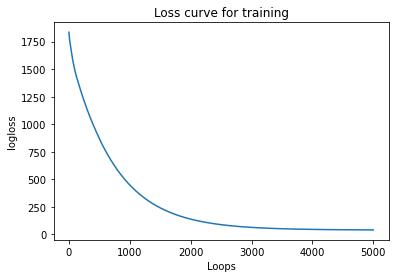

In [54]:
######## RUN VPART #########
# nn = NN()
nn.vpart_data_split(vpart_input)
nn.weights()
for i in range(nn.loops):
    # yhat, loss = nn.fwd_prop()
    yhat, loss_val = nn.fwd_prop()
    # loss_val = nn.sq_loss(yhat, nn.y)
    nn.bwd_prop(yhat)
    nn.loss.append(loss_val)
    # print("--------------------")
    # print("LOSS: ", loss_val)
    # print("LOOP: ", i)
    # print("--------------------")
    # print(loss)
nn.plot_loss()

In [58]:
print(min(nn.loss))

[39.8452868]


In [59]:
###### RUN ONLY WHEN TRAINING VPart ######

fx = open("trained_weights_vpart", "wb")
pickle.dump(nn.wb_dict, fx)
fx.close()

In [11]:
fx = open("trained_weights_vpart", "rb")
trained_weights_vpart =  pickle.load(fx)
# wb_dict = pickle.load(f3)
fx.close()

In [61]:
# trained_weights = trained_weights_vpart

In [12]:
class vAgent:
    
    def __init__(self, graph, prey_loc, pred_loc, state_space, dbg=False):

        self.graph = graph
        self.agent_loc = graph.get_rand_node()
        self.dbg = dbg
        self.prey_loc = prey_loc
        self.pred_loc = pred_loc
        self.state_space = copy.copy(state_space)

        # while prey_loc == self.agent_loc or pred_loc == self.agent_loc or pred_loc == self.agent_loc + 1 or pred_loc == self.agent_loc - 1:
        while prey_loc == self.agent_loc or pred_loc == self.agent_loc or state_space[(self.agent_loc, prey_loc, pred_loc)][1] == math.inf:
            self.agent_loc = graph.get_rand_node()


    def debug(self, *args):
        if self.dbg:
            print("agentV: ", args)


    def isPrey(self, loc, prey_loc):
        if self.agent_loc == prey_loc:
            return True

    def isPred(self, loc, pred_loc):
        if self.agent_loc == pred_loc:
            return True


    def move(self, prey_loc, pred_loc, state_space):

        agent_nbrs = self.graph.get_next_moves(self.agent_loc)

        agent_nbr_util = {}
        # prey_pred_dist = []
        row, col = (1, 2)
        prey_pred_dist = [[0 for n in range(col)] for m in range(row)]
        
        for nbr in agent_nbrs:
            # tmp_dist = 0
            # for i in range(len(prey_belief)):
            #     tmp_dist += (len(g.BFS(nbr, prey_loc))-1) * prey_belief[i] #############
            prey_pred_dist[0][0] = len(g.BFS(nbr, prey_loc))
            prey_pred_dist[0][1] = len(g.BFS(nbr, pred_loc))

            x = prey_pred_dist
            x = np.array(prey_pred_dist)
            
            agent_nbr_util[nbr] = nn.trained_fwd_prop(x)

        
        min_util = min(agent_nbr_util.values())

        for key in agent_nbr_util:
            if min_util == agent_nbr_util[key]:
                minm = key

        self.agent_loc = minm

        return self.agent_loc

In [ ]:

class vPartAgent:
    
    def __init__(self, graph, prey_loc, pred_loc, prey_belief, state_space, dbg=False):

        self.graph = graph
        self.agent_loc = graph.get_rand_node()
        self.dbg = dbg
        self.prey_loc = prey_loc
        self.pred_loc = pred_loc
        self.state_space = copy.copy(state_space)
        
        self.vpart_dict = {}

        # while prey_loc == self.agent_loc or pred_loc == self.agent_loc or pred_loc == self.agent_loc + 1 or pred_loc == self.agent_loc - 1:
        while prey_loc == self.agent_loc or pred_loc == self.agent_loc or state_space[(self.agent_loc, prey_loc, pred_loc)][1] == math.inf:
            self.agent_loc = graph.get_rand_node()

        self.prey_belief = prey_belief
        self.prey_belief[self.agent_loc] = 0

    def debug(self, *args):
        if self.dbg:
            print("AgentVPart: ", args)


    def isPrey(self, loc, prey_loc):
        if self.agent_loc == prey_loc:
            return True

    def isPred(self, loc, pred_loc):
        if self.agent_loc == pred_loc:
            return True

    def survey(self, prey_belief):
        ## look at current list of belief - select max prob nodes (if multiple - select one at random)
        new_prey_belief = [0.0]*(self.graph.node_num)

        val_max = max(prey_belief)
        # idx_max = 0 ## not needed
        idx_max_list = []

        for i in range(len(prey_belief)):
            if prey_belief[i] >= val_max:
                # val_max = prey_belief[i]
                idx_max_list.append(i)

        rand_idx_max = random.choice(idx_max_list)

        # ### check if prey is there or not
        # 
        if self.isPrey(rand_idx_max, self.prey_loc):
            # print("IS PREY EXECUTED: ", rand_idx_max)
            for i in range(self.graph.node_num):
                prey_belief[i] = 0.0
            prey_belief[rand_idx_max] = 1.0
            # print ("ISPREY: ", prey_belief)
            return prey_belief
        #     update_belief ## according to prey found in survey logic
                
        else:
        #     update_belief ## according to prey not found in survey logic
            for i in range(self.graph.node_num):
                # denom = sum(prey_belief)-prey_belief[rand_idx_max]
                denom = 1-prey_belief[rand_idx_max]
                new_prey_belief[i] = prey_belief[i]/denom
                new_prey_belief[rand_idx_max] = 0.0

        prey_belief = new_prey_belief
        return prey_belief

    def agent_move_prey_belief(self, prey_loc, prey_belief):

        new_prey_belief = [0.0]*(self.graph.node_num)
        # new_prey_belief = prey_belief

        if self.isPrey(self.agent_loc, prey_loc):
            for i in range(self.graph.node_num): ###///this will not actually happen since the game would be over
                prey_belief[i] = 0.0
            prey_belief[self.agent_loc] = 1.0
            return prey_belief  
        
        else:
        #   update_belief ## according to prey not found in survey logic
            for i in range(self.graph.node_num):
                # denom = sum(prey_belief)-prey_belief[self.agent_loc]
                denom = 1.0-prey_belief[self.agent_loc]
                new_prey_belief[i] = prey_belief[i]/denom
                new_prey_belief[self.agent_loc] = 0.0

        prey_belief = new_prey_belief
        return prey_belief

    def prey_move_prey_belief(self, prey_loc, prey_belief):

        new_prey_belief = [0.0]*(self.graph.node_num)
        # new_prey_belief = prey_belief

        for i in range(self.graph.node_num):
            nbrs_i = self.graph.get_next_moves(i)
            nbrs_i.append(i)
            for nbr in nbrs_i:
                denom = self.graph.get_deg(nbr) + 1
                new_prey_belief[i] += prey_belief[nbr] / denom

        prey_belief = new_prey_belief

        prey_belief = self.agent_move_prey_belief(prey_loc, prey_belief)

        # prey_belief = new_prey_belief
        return prey_belief


    def move(self, prey_loc, pred_loc, prey_belief, state_space):

        prey_belief = self.survey(prey_belief)

        agent_nbrs = self.graph.get_next_moves(self.agent_loc)

        agent_nbr_util = {}
        tmp_list = [] ##########
        for nbr in agent_nbrs:
            # agent_nbr_util[nbr] = state_space[(nbr, prey_loc, pred_loc)][1]
            tmp = 0
            tmp_dist = 0 ###########
            tmp2_list = [] ##########
            for i in range(len(prey_belief)):
                if state_space[(nbr, i, pred_loc)][1] == math.inf:
                    tmp = math.inf
                    break
                    
                tmp += state_space[(nbr, i, pred_loc)][1] * prey_belief[i]
                tmp_dist += (len(g.BFS(nbr, prey_loc))-1) * prey_belief[i] #############
                
            agent_nbr_util[nbr] = tmp
            
            tmp2_list.append(tmp_dist) #################
            tmp2_list.append((len(g.BFS(nbr, pred_loc))-1)) #################
            tmp2_list.append(tmp) #################
            
            tmp_list.append(tmp2_list) ###############
            
        min_util = min(agent_nbr_util.values())
        agentUPart.debug("min_util", min_util)
        for key in agent_nbr_util:
            if min_util == agent_nbr_util[key]:
                minm = key

        agentUPart.debug("AGENT NBR UTIL: ", agent_nbr_util, "(",nbr, prey_loc, pred_loc,")")

        self.agent_loc = minm

        prey_belief = self.agent_move_prey_belief(prey_loc, prey_belief)

        return self.agent_loc, tmp_list

In [ ]:
# g1 = nx.read_gpickle("/content/drive/MyDrive/Colab Notebooks/g1.gpickle")
threshold = 5000
loops = 3000
hung = 0
cnt = 0
ans = 0

survival = []
vpart_data = []



for i in range(loops):
    preyVPart = Prey(g)
    predVPart = Predator(g)
    prey_belief = [1/(g.node_num-1)]*(g.node_num) ### [1/49]*50

    agentVPart = vPartAgent(g, preyVPart.loc, predVPart.loc, prey_belief, state_space, False)
    
    count = 0
    
    while agentVPart.agent_loc != preyVPart.loc and agentVPart.agent_loc != predVPart.loc:
        
        if count > threshold:
            print("HUNG SIMULATION")
            hung += 1
            continue

        # agentVPart.debug("BEFORE", agentVPart.agent_loc, preyVPart.loc, predVPart.loc)

        agentVPart.agent_loc, tmp_list = agentVPart.move(preyVPart.loc, predVPart.loc, prey_belief, state_space)
        for data in tmp_list:
            vpart_data.append(data)
        prey_belief = agentVPart.agent_move_prey_belief(preyVPart.loc, prey_belief)

        if agentVPart.isPred(agentVPart.agent_loc, predVPart.loc) and agentVPart.isPrey(agentVPart.agent_loc, preyVPart.loc):
            # print(True)
            ans += 1
            continue

        elif agentVPart.isPred(agentVPart.agent_loc, predVPart.loc):
            print(False, agentVPart.agent_loc, preyVPart.loc, predVPart.loc)
            continue

        elif agentVPart.isPrey(agentVPart.agent_loc, preyVPart.loc):
            # print(True)
            ans += 1
            continue
        
        preyVPart.loc = preyVPart.move()
        prey_belief = agentVPart.prey_move_prey_belief(preyVPart.loc, prey_belief) 
        
        predVPart.loc = predVPart.move(agentVPart.agent_loc)
        
        if agentVPart.isPred(agentVPart.agent_loc, predVPart.loc) and agentVPart.isPrey(agentVPart.agent_loc, preyVPart.loc):
            # print(True)
            ans += 1
            continue

        elif agentVPart.isPred(agentVPart.agent_loc, predVPart.loc):
            print(False, agentVPart.agent_loc, preyVPart.loc)
            continue

        elif agentVPart.isPrey(agentVPart.agent_loc, preyVPart.loc):
            # print(True)
            ans += 1
            continue      
        
        count += 1

    cnt += 1
    survival.append(count)
    # print("cnt: ", cnt, "Steps : ", count)

    
# print(vpart_data)
print("============================")
print("CNT: ", cnt)
print("TRUE: ", ans)
print("FALSE: ", cnt-(ans+hung))
print("HUNG: ", hung)
# avg_steps = sum(survival)
sum = 0
for i in survival:
    sum += i

print("AVG. STEPS: ", sum/loops)
print("============================")
######################################

# fv = open("vpart_input", "wb")
# # nx.gpickle.
# pickle.dump(vpart_data, fv)
# fv.close()



In [ ]:
# # g1 = nx.read_gpickle("/content/drive/MyDrive/Colab Notebooks/g1.gpickle")
# threshold = 5000
# loops = 1000
# hung = 0
# cnt = 0
# ans = 0

# survival = []

# for i in range(loops):
#     preyV = Prey(g)
#     predV = Predator(g)

#     agentV = vPartAgent(g, preyV.loc, predV.loc, state_space, False)
    
#     count = 0
    
#     while agentV.agent_loc != preyV.loc and agentV.agent_loc != predV.loc:
        
#         if count > threshold:
#             print("HUNG SIMULATION")
#             hung += 1
#             continue

#         agentV.debug("BEFORE", agentV.agent_loc, preyV.loc, predV.loc)

#         agentV.agent_loc = agentV.move(preyV.loc, predV.loc, state_space)
        
#         if agentV.isPred(agentV.agent_loc, predV.loc) and agentV.isPrey(agentV.agent_loc, preyV.loc):
#             print(True)
#             ans += 1
#             continue

#         elif agentV.isPred(agentV.agent_loc, predV.loc):
#             print(False)
#             continue

#         elif agentV.isPrey(agentV.agent_loc, preyV.loc):
#             print(True)
#             ans += 1
#             continue
        
#         preyV.loc = preyV.move()
        
#         predV.loc = predV.move(agentV.agent_loc)
        
#         if agentV.isPred(agentV.agent_loc, predV.loc) and agentV.isPrey(agentV.agent_loc, preyV.loc):
#             print(True)
#             ans += 1
#             continue

#         elif agentV.isPred(agentV.agent_loc, predV.loc):
#             print(False)
#             continue

#         elif agentV.isPrey(agentV.agent_loc, preyV.loc):
#             print(True)
#             ans += 1
#             continue      
        
#         count += 1

#     cnt += 1
#     survival.append(count)
#     # print("cnt: ", cnt, "Steps : ", count)


# print("============================")
# print("CNT: ", cnt)
# print("TRUE: ", ans)
# print("FALSE: ", cnt-(ans+hung))
# print("HUNG: ", hung)
# # avg_steps = sum(survival)
# sum = 0
# for i in survival:
#     sum += i

# print("AVG. STEPS: ", sum/loops)
# print("============================")


In [ ]:

# class vPartAgent:
    
#     def __init__(self, graph, prey_loc, pred_loc, prey_belief, state_space, dbg=False):

#         self.graph = graph
#         self.agent_loc = graph.get_rand_node()
#         self.dbg = dbg
#         self.prey_loc = prey_loc
#         self.pred_loc = pred_loc
#         self.state_space = copy.copy(state_space)
        
#         self.vpart_dict = {}

#         # while prey_loc == self.agent_loc or pred_loc == self.agent_loc or pred_loc == self.agent_loc + 1 or pred_loc == self.agent_loc - 1:
#         while prey_loc == self.agent_loc or pred_loc == self.agent_loc or state_space[(self.agent_loc, prey_loc, pred_loc)][1] == math.inf:
#             self.agent_loc = graph.get_rand_node()

#         self.prey_belief = prey_belief
#         self.prey_belief[self.agent_loc] = 0

#     def debug(self, *args):
#         if self.dbg:
#             print("AgentVPart: ", args)


#     def isPrey(self, loc, prey_loc):
#         if self.agent_loc == prey_loc:
#             return True

#     def isPred(self, loc, pred_loc):
#         if self.agent_loc == pred_loc:
#             return True

#     def survey(self, prey_belief):
#         ## look at current list of belief - select max prob nodes (if multiple - select one at random)
#         new_prey_belief = [0.0]*(self.graph.node_num)

#         val_max = max(prey_belief)
#         # idx_max = 0 ## not needed
#         idx_max_list = []

#         for i in range(len(prey_belief)):
#             if prey_belief[i] >= val_max:
#                 # val_max = prey_belief[i]
#                 idx_max_list.append(i)

#         rand_idx_max = random.choice(idx_max_list)

#         # ### check if prey is there or not
#         # 
#         if self.isPrey(rand_idx_max, self.prey_loc):
#             # print("IS PREY EXECUTED: ", rand_idx_max)
#             for i in range(self.graph.node_num):
#                 prey_belief[i] = 0.0
#             prey_belief[rand_idx_max] = 1.0
#             # print ("ISPREY: ", prey_belief)
#             return prey_belief
#         #     update_belief ## according to prey found in survey logic
                
#         else:
#         #     update_belief ## according to prey not found in survey logic
#             for i in range(self.graph.node_num):
#                 # denom = sum(prey_belief)-prey_belief[rand_idx_max]
#                 denom = 1-prey_belief[rand_idx_max]
#                 new_prey_belief[i] = prey_belief[i]/denom
#                 new_prey_belief[rand_idx_max] = 0.0

#         prey_belief = new_prey_belief
#         return prey_belief

#     def agent_move_prey_belief(self, prey_loc, prey_belief):

#         new_prey_belief = [0.0]*(self.graph.node_num)
#         # new_prey_belief = prey_belief

#         if self.isPrey(self.agent_loc, prey_loc):
#             for i in range(self.graph.node_num): ###///this will not actually happen since the game would be over
#                 prey_belief[i] = 0.0
#             prey_belief[self.agent_loc] = 1.0
#             return prey_belief  
        
#         else:
#         #   update_belief ## according to prey not found in survey logic
#             for i in range(self.graph.node_num):
#                 # denom = sum(prey_belief)-prey_belief[self.agent_loc]
#                 denom = 1.0-prey_belief[self.agent_loc]
#                 new_prey_belief[i] = prey_belief[i]/denom
#                 new_prey_belief[self.agent_loc] = 0.0

#         prey_belief = new_prey_belief
#         return prey_belief

#     def prey_move_prey_belief(self, prey_loc, prey_belief):

#         new_prey_belief = [0.0]*(self.graph.node_num)
#         # new_prey_belief = prey_belief

#         for i in range(self.graph.node_num):
#             nbrs_i = self.graph.get_next_moves(i)
#             nbrs_i.append(i)
#             for nbr in nbrs_i:
#                 denom = self.graph.get_deg(nbr) + 1
#                 new_prey_belief[i] += prey_belief[nbr] / denom

#         prey_belief = new_prey_belief

#         prey_belief = self.agent_move_prey_belief(prey_loc, prey_belief)

#         # prey_belief = new_prey_belief
#         return prey_belief


#     def move(self, prey_loc, pred_loc, prey_belief, state_space):

#         prey_belief = self.survey(prey_belief)

#         agent_nbrs = self.graph.get_next_moves(self.agent_loc)

#         agent_nbr_util = {}
#         tmp_list = [] ##########
#         for nbr in agent_nbrs:
#             # agent_nbr_util[nbr] = state_space[(nbr, prey_loc, pred_loc)][1]
#             tmp = 0
#             tmp_dist = 0 ###########
#             tmp2_list = [] ##########
#             for i in range(len(prey_belief)):
#                 if state_space[(nbr, i, pred_loc)][1] == math.inf:
#                     tmp = math.inf
#                     break
                    
#                 tmp += state_space[(nbr, i, pred_loc)][1] * prey_belief[i]
#                 tmp_dist += (len(g.BFS(nbr, prey_loc))-1) * prey_belief[i] #############
                
#             agent_nbr_util[nbr] = tmp
            
#             tmp2_list.append(tmp_dist) #################
#             tmp2_list.append((len(g.BFS(nbr, pred_loc))-1)) #################
#             tmp2_list.append(tmp) #################
            
#             tmp_list.append(tmp2_list) ###############
            
#         min_util = min(agent_nbr_util.values())
#         agentUPart.debug("min_util", min_util)
#         for key in agent_nbr_util:
#             if min_util == agent_nbr_util[key]:
#                 minm = key

#         agentUPart.debug("AGENT NBR UTIL: ", agent_nbr_util, "(",nbr, prey_loc, pred_loc,")")

#         self.agent_loc = minm

#         prey_belief = self.agent_move_prey_belief(prey_loc, prey_belief)

#         return self.agent_loc, tmp_list

In [ ]:
# # g1 = nx.read_gpickle("/content/drive/MyDrive/Colab Notebooks/g1.gpickle")
# threshold = 5000
# loops = 3000
# hung = 0
# cnt = 0
# ans = 0

# survival = []
# vpart_data = []



# for i in range(loops):
#     preyVPart = Prey(g)
#     predVPart = Predator(g)
#     prey_belief = [1/(g.node_num-1)]*(g.node_num) ### [1/49]*50

#     agentVPart = vPartAgent(g, preyVPart.loc, predVPart.loc, prey_belief, state_space, False)
    
#     count = 0
    
#     while agentVPart.agent_loc != preyVPart.loc and agentVPart.agent_loc != predVPart.loc:
        
#         if count > threshold:
#             print("HUNG SIMULATION")
#             hung += 1
#             continue

#         # agentVPart.debVg("BEFORE", agentVPart.agent_loc, preyVPart.loc, predVPart.loc)

#         agentVPart.agent_loc, tmp_list = agentVPart.move(preyVPart.loc, predVPart.loc, prey_belief, state_space)
#         for data in tmp_list:
#             vpart_data.append(data)
#         prey_belief = agentVPart.agent_move_prey_belief(preyVPart.loc, prey_belief)

#         if agentVPart.isPred(agentVPart.agent_loc, predVPart.loc) and agentVPart.isPrey(agentVPart.agent_loc, preyVPart.loc):
#             # print(True)
#             ans += 1
#             continue

#         elif agentVPart.isPred(agentVPart.agent_loc, predVPart.loc):
#             print(False, agentVPart.agent_loc, preyVPart.loc, predVPart.loc)
#             continue

#         elif agentVPart.isPrey(agentVPart.agent_loc, preyVPart.loc):
#             # print(True)
#             ans += 1
#             continue
        
#         preyVPart.loc = preyVPart.move()
#         prey_belief = agentVPart.prey_move_prey_belief(preyVPart.loc, prey_belief) 
        
#         predVPart.loc = predVPart.move(agentVPart.agent_loc)
        
#         if agentVPart.isPred(agentVPart.agent_loc, predVPart.loc) and agentVPart.isPrey(agentVPart.agent_loc, preyVPart.loc):
#             # print(True)
#             ans += 1
#             continue

#         elif agentVPart.isPred(agentVPart.agent_loc, predVPart.loc):
#             print(False, agentVPart.agent_loc, preyVPart.loc)
#             continue

#         elif agentVPart.isPrey(agentVPart.agent_loc, preyVPart.loc):
#             # print(True)
#             ans += 1
#             continue      
        
#         count += 1

#     cnt += 1
#     survival.append(count)
#     # print("cnt: ", cnt, "Steps : ", count)

    
# # print(vpart_data)
# print("============================")
# print("CNT: ", cnt)
# print("TRUE: ", ans)
# print("FALSE: ", cnt-(ans+hung))
# print("HUNG: ", hung)
# # avg_steps = sum(survival)
# sum = 0
# for i in survival:
#     sum += i

# print("AVG. STEPS: ", sum/loops)
# print("============================")
# ######################################

# # fv = open("vpart_input", "wb")
# # # nx.gpickle.
# # pickle.dump(vpart_data, fv)
# # fv.close()

